In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
rawdata = "cumulative.csv"

In [4]:
raw_df = pd.read_csv(rawdata)
raw_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
X=raw_df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec"]]

In [6]:
ydata = raw_df["koi_pdisposition"]
ybin_encode = pd.get_dummies(ydata, columns=["koi_pdisposition"])
y2 = ybin_encode
y2.head()

,CANDIDATE,FALSE POSITIVE
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=25)
# X_train.head()
# y_train.head()

In [8]:
X_scaler = MinMaxScaler().fit(X_train)

In [9]:
scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

In [13]:
train_scores = []
test_scores = []
total_scores = []
for k in range (1,15,3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    train_score = knn.score(scaled_X_train, y_train)
    test_score = knn.score(scaled_X_test, y_test)
    total_score = test_score + train_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    total_scores.append(total_score)
    
    print(f"k={k}, Total Score={total_score:.2f}")

k=1, Total Score=1.97
k=4, Total Score=1.97
k=7, Total Score=1.97
k=10, Total Score=1.97
k=13, Total Score=1.97


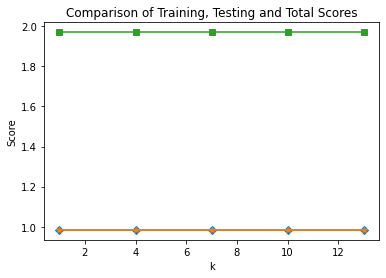

In [14]:
plt.plot(range(1, 15, 3), train_scores, marker='D')
plt.plot(range(1, 15, 3), test_scores, marker="*")
plt.plot(range(1, 15, 3), total_scores, marker='s')
plt.title("Comparison of Training, Testing and Total Scores")
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(scaled_X_train, y_train)
print('for k=4, Accuracy is: %.2f' % knn.score(scaled_X_test, y_test))

for k=4, Accuracy is: 0.98


In [18]:
knn.predict(scaled_X_test)

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)